In [1]:
import matplotlib.pyplot as plt
import numpy as np
from flygym import Fly, Camera, SingleFlySimulation
from flygym.vision import Retina
from utils.arenas import ScatteredPillarsArena

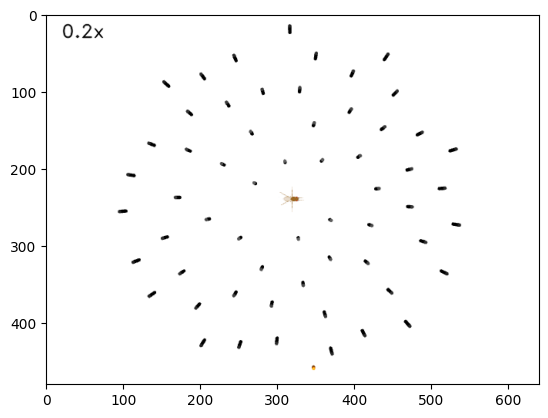

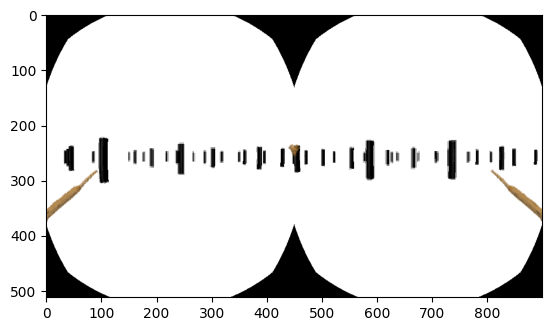

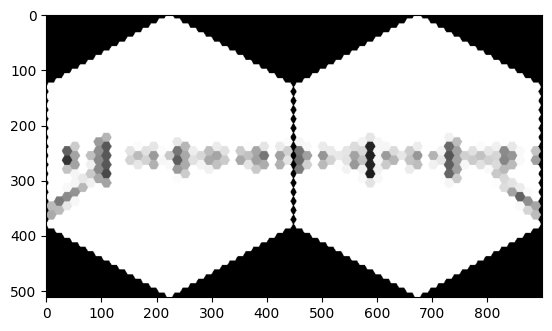

In [2]:
plt.style.use("default")
retina = Retina()

fly = Fly(render_raw_vision=True, enable_vision=True)
arena = ScatteredPillarsArena(seed=0)
cam_params = {
    "class": "nmf",
    "mode": "track",
    "ipd": 0.068,
    "pos": [0, 0, 80],
    "euler": [0, 0, 0],
}
cam = Camera(
    attachment_point=fly.model.worldbody,
    camera_name="camera_top_zoomout",
    camera_parameters=cam_params,
)
sim = SingleFlySimulation(
    fly=fly,
    arena=arena,
    cameras=[cam],
)
obs, info = sim.reset(seed=0)

fig, ax = plt.subplots()
ax.imshow(sim.render()[0])

fig, ax = plt.subplots()
ax.imshow(np.concatenate(info["raw_vision"], axis=1) / 255)

fig, ax = plt.subplots()
ax.imshow(
    np.concatenate(
        [
            retina.hex_pxls_to_human_readable(i, color_8bit=False).max(-1)
            for i in obs["vision"]
        ],
        axis=1,
    ),
    cmap="gray",
)